# Image classification on a 3 class Dataset(Amazon scraped data(product images)) 
Refer to [Webscrapping Amazon](https://github.com/preetham59/Web-Scrapping-Product-Images) for Dataset (Image Data Scrapping)

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
os.getcwd()

'/content'

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
saree_dir = os.path.join('/content/drive/My Drive/Train_data/sarees')
Jeans_dir = os.path.join('/content/drive/My Drive/Train_data/Men Jeans')
Trousers_dir = os.path.join('/content/drive/My Drive/Train_data/Trousers')

print('Total training saree images:', len(os.listdir(saree_dir)))
print('Total training Jeans images:', len(os.listdir(Jeans_dir)))
print('Total training Trouser images:', len(os.listdir(Trousers_dir)))

saree_files = os.listdir(saree_dir)
print(saree_files[:10])

Jeans_files = os.listdir(Jeans_dir)
print(Jeans_files[:10])

Trousers_files = os.listdir(Trousers_dir)
print(Trousers_files[:10])

Total training saree images: 101
Total training Jeans images: 101
Total training Trouser images: 100
['saree_0.jpeg', 'saree_1.jpeg', 'saree_2.jpeg', 'saree_3.jpeg', 'saree_4.jpeg', 'saree_6.jpeg', 'saree_5.jpeg', 'saree_9.jpeg', 'saree_8.jpeg', 'saree_7.jpeg']
['jeans_1.jpeg', 'jeans_3.jpeg', 'jeans_0.jpeg', 'jeans_2.jpeg', 'jeans_7.jpeg', 'jeans_5.jpeg', 'jeans_6.jpeg', 'jeans_4.jpeg', 'jeans_8.jpeg', 'jeans_9.jpeg']
['trouser_0.jpeg', 'trouser_1.jpeg', 'trouser_2.jpeg', 'trouser_3.jpeg', 'trouser_4.jpeg', 'trouser_5.jpeg', 'trouser_7.jpeg', 'trouser_6.jpeg', 'trouser_8.jpeg', 'trouser_9.jpeg']


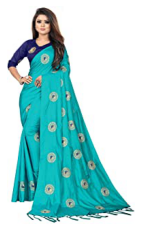

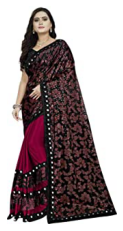

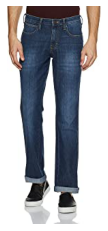

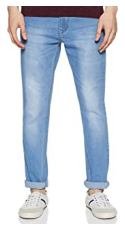

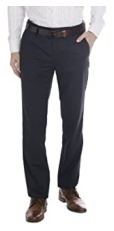

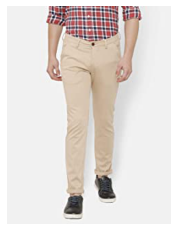

In [40]:
pic_index = 2

next_saree= [os.path.join(saree_dir, fname) 
                for fname in saree_files[pic_index-2:pic_index]]
next_Jeans = [os.path.join(Jeans_dir, fname) 
                for fname in Jeans_files[pic_index-2:pic_index]]
next_Trousers = [os.path.join(Trousers_dir, fname) 
                for fname in Trousers_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_saree+next_Jeans+next_Trousers):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

## Data Preprocessing

In [41]:
TRAINING_DIR = "/content/drive/My Drive/Train_data/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=(30),
    brightness_range=[0.5,1.5],
    horizontal_flip=True,
    vertical_flip=True,
    shear_range = 0.2,
    fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Test_data/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    save_to_dir='/content/drive/My Drive/Augmented',class_mode='categorical',save_prefix='N',save_format='jpeg',batch_size=10)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical')


Found 299 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


# Model Building

In [42]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Training

In [45]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
30/30 [==============================] - 6s 215ms/step - loss: 1.2597 - accuracy: 0.4281 - val_loss: 0.9235 - val_accuracy: 0.4667
Epoch 2/25
30/30 [==============================] - 7s 217ms/step - loss: 0.7595 - accuracy: 0.5619 - val_loss: 0.7729 - val_accuracy: 0.5867
Epoch 3/25
30/30 [==============================] - 6s 215ms/step - loss: 0.7885 - accuracy: 0.6221 - val_loss: 0.7831 - val_accuracy: 0.5600
Epoch 4/25
30/30 [==============================] - 6s 212ms/step - loss: 0.6645 - accuracy: 0.6321 - val_loss: 1.5216 - val_accuracy: 0.5333
Epoch 5/25
30/30 [==============================] - 6s 215ms/step - loss: 0.6296 - accuracy: 0.6890 - val_loss: 0.7976 - val_accuracy: 0.5600
Epoch 6/25
30/30 [==============================] - 7s 218ms/step - loss: 0.7090 - accuracy: 0.6622 - val_loss: 0.7373 - val_accuracy: 0.6400
Epoch 7/25
30/30 [==============================] - 7s 220ms/step - loss: 0.6019 - accuracy: 0.6656 - val_loss: 1.2120 - val_accuracy: 0.6267
Epoch 

## Model Evaluation (Accuracy & Loss)

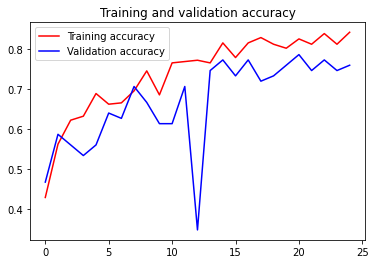

<Figure size 432x288 with 0 Axes>

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Model Validation

In [47]:
# load all images into a list
images = []
img_folder = os.path.join('/content/drive/My Drive/Val/')
img_files = os.listdir(img_folder)
img_files = [os.path.join(img_folder, f) for f in img_files]
# print(img_files)
for img in img_files:
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
# print(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[2 2 2 1 1 1 0 0 0 1 0 0 0 1 0 2 2 0 0 1]
